<a href="https://colab.research.google.com/github/PreetKumarBAU/-Chagas-Parasite-Detection-in-Blood-Images/blob/main/Latest_various_classification_models_chagasdataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from keras.regularizers import l2
from datetime import datetime 


# extract folder of chages disease images and non chagas disease images
## We should have two folders ( Chagas and Non-Chagas )
#!unzip "/content/drive/MyDrive/ChagasTest.zip"

#!unzip "/content/drive/MyDrive/ChagasValidation.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/Non-ChagasData_Selected.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/ChagasTraining.zip"


In [ ]:
import os 
import seaborn as sns
from keras.applications.vgg16 import VGG16
training_dir =  "../input/training/training"
test_dir =      "../input/testdata/Test"
validation_dir= "../input/validation/Validation"

training_dir_images = os.path.join(training_dir , "images")
test_dir_images = os.path.join(test_dir , "images")
validation_dir_images = os.path.join(validation_dir , "images")


Training_Non_ChagasFiles = [ "i_0450,i_0389,i_0392 ,i_0395 , i_0440 ,i_0429 , i_0406 , i_0398 , i_0369 , i_0374, i_0348, i_0339,  i_0337 , i_0389 ,i_0334, i_0324 ,i_0279, i_0280, i_0281 , i_0263 , i_0264 , i_0254 , i_0253 , i_0245 , i_0240 , i_0238 , i_0235 , i_0226 , i_0201, i_0184, i_0156, i_0150, i_0148 , i_0152 , i_0099 , i_0018 , i_0001" ]


Validation_Non_ChagasFiles = ["i842 , i806 , i_0583, i_0559 , i_0528 , i_0529 , i_0583 , i_0559 , i_0528 , i_0529 , i_0481, i_0394 , i_0183 , i_0078 , i_0042 , i_0022" ]


Test_Non_ChagasFiles = ["i_0579 , i_0579d , i_0050dd , i_0046d , i_0046dd , i_0047dd , i_0047d , i_0048d , i_0048dd ,i_0049d , i_0049dd , i_0050d , i_0050dd" ]

Non_chagas_files_names = []

Non_chagas_files_names.extend(Training_Non_ChagasFiles)
Non_chagas_files_names.extend(Validation_Non_ChagasFiles)
Non_chagas_files_names.extend(Test_Non_ChagasFiles)

NC = []
for string in Non_chagas_files_names:
  
  NC.extend(string.split(","))

Non_Chagas_Files = []
for values in NC:
  Non_Chagas_Files.append(values.strip())




In [ ]:
training_dir_images

'../input/training/training/images'

In [ ]:
import cv2
from skimage import io


###Extract the Each Image and Label them as 0 or 1  ( label the chagas images as 1 and non chagas as 0)
# we can have seperate list(or any array) for each of them[images and their corresponding labels ] ( one containing the arrays representing Each Image and another containing values/labels )

labels = []
images = []
file_name= []
for file in os.listdir(training_dir_images):
  if file.endswith(".png"):
      
    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))

  else:
    pass

for file in os.listdir(test_dir_images):
  if file.endswith(".png"):


    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
  
  else:
    pass


for file in os.listdir(validation_dir_images):
  if file.endswith(".png"):
    

    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
  else:
    pass
# Where X is Array containing Arrays( representing Images)
# Where Y is Array containing Labels(values as 0 and 1 ) ( representing labels for each Image)



In [ ]:
import numpy as np
filename_to_label_dict = dict(zip(file_name , labels))
from collections import Counter
Counter(filename_to_label_dict.values() )

Counter({1: 918, 0: 60})

In [ ]:
for file_path in os.listdir("../input/non-chagas/Non-ChagasData_Selected"):
  if file_path.endswith(".png"):
    labels.append(0)
      
    images.append(cv2.resize(cv2.imread(os.path.join("../input/non-chagas/Non-ChagasData_Selected" , file_path)), (256, 256)))

In [ ]:
import numpy as np
np.unique(np.array(labels) ,return_counts = True )

(array([0, 1]), array([559, 940]))

In [ ]:
#imagess = []
#for imagesss in images:
#  imagess.append(cv2.resize(imagesss , (256 , 256 )))

In [ ]:

# Split the Images and labels into Train , Test and Validation Data
print(type(images))
images = np.array(images , dtype = "float32")
labels = np.array(labels, dtype = 'int32')
print(type(images))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape[0])
print(labels.shape[0])


1499
1499


In [ ]:

#n = np.arange(images.shape[0])
#np.random.shuffle(n)
#images = images[n]
#labels = labels[n]


In [ ]:
import random

# Shuffle
from sklearn.utils import shuffle
#images, labels = shuffle(images, labels, random_state=10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2 , random_state=10)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5 , random_state=10)



In [ ]:
test_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 1199
Number of validation examples: 150
Number of testing examples: 150
Training images are of shape: (1199, 256, 256, 3)
Training labels are of shape: (1199,)
Validation images are of shape: (150, 256, 256, 3)
Validation labels are of shape: (150,)
Test images are of shape: (150, 256, 256, 3)
Test labels are of shape: (150,)


In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, \
    add, multiply ,  Dense, Conv2D, Activation, Flatten
from keras.layers import concatenate, core, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Lambda
#import keras.backend as K
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation, add,average,concatenate , Conv2DTranspose
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
#%tensorflow_version 1.x
from keras.callbacks import TensorBoard
from keras.callbacks import CSVLogger
from glob import glob
from sklearn.model_selection import train_test_split


import keras
import tensorflow as tf
#import keras.backend.tensorflow_backend as K
import keras.backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2


import numpy as np



In [ ]:

from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 

from sklearn.metrics import accuracy_score, confusion_matrix

from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings
warnings.filterwarnings("ignore")


## Metrics

In [ ]:


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


# One Hot Encodeing

In [ ]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(val_labels)


# **Data_Augmentation**

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

# Fine Tunning on Inception Model 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def Fine_Tunned_Inception_Model(pretrained_weights = None):
    IMG_SIZE = 256

    # create the base pre-trained model
    base_model = InceptionV3(weights='imagenet', include_top=False , input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # let's add a fully-connected layer

    x = Dense(units = 512 , activation = 'relu'  )(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 128 , activation = 'relu'  )(x)
    x = Dropout(0.3)(x)
    x=  Dense(units = 64 , activation = 'relu' )(x)
    x = Dropout(0.1)(x)

    # Output layer
    # For dense = 1  or for binary classification, we use activation = "linear"
    output  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=output)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False
                
    if (pretrained_weights):
        model.load_weights(pretrained_weights)

    # For SVM as last layer we use Different Loss Function "squared_hinge" for multi-class and "hinge" loss for binary class 
    model.compile(optimizer=Adam(lr=7.00E-05), loss = 'hinge', metrics = ['accuracy',precision,recall])
    return model

            
Inception_Fine_tunned_Model = Fine_Tunned_Inception_Model()
Inception_Fine_tunned_Model.summary()
                
model_checkpoint1 = keras.callbacks.ModelCheckpoint('Inception_Fune_Tuned_Weights.hdf5', monitor='val_loss',verbose=1, mode='min',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values1.log', append=True, separator=';')

# Implement callbacks 
#checkpoint = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, save_weights_only=False)

# Train

history = Inception_Fine_tunned_Model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 10, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])


87916544/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_____________________________

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. 
#We will freeze the bottom N layers and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers we should freeze:
#for i, layer in enumerate(base_model.layers):
#   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in Inception_Fine_tunned_Model.layers[:249]:
   layer.trainable = False
for layer in Inception_Fine_tunned_Model.layers[249:]:
   layer.trainable = True


In [ ]:
Inception_Fine_tunned_Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:

history = Inception_Fine_tunned_Model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 20, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])


Epoch 1/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1542 - accuracy: 0.9450 - precision: 0.8117 - recall: 0.8283 - val_loss: 0.0700 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800

Epoch 00001: val_loss improved from 0.07684 to 0.06995, saving model to Inception_Fune_Tuned_Weights.hdf5
Epoch 2/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1406 - accuracy: 0.9475 - precision: 0.8200 - recall: 0.8392 - val_loss: 0.0843 - val_accuracy: 0.9667 - val_precision: 0.8600 - val_recall: 0.8600

Epoch 00002: val_loss did not improve from 0.06995
Epoch 3/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1353 - accuracy: 0.9533 - precision: 0.8142 - recall: 0.8333 - val_loss: 0.0908 - val_accuracy: 0.9733 - val_precision: 0.8667 - val_recall: 0.8800

Epoch 00003: val_loss did not improve from 0.06995
Epoch 4/20
600/600 [==============================] - 11s 19ms/step - loss: 0.1368 - accuracy: 0.9550 - precisi

### Accuracy on Test Images (Fine Tunned Inception Based Model)

In [ ]:
# Before Training the Last Layers of Inception Model Test accuracy was 94.67% and then
#after it increased to 96%

print("Train_Accuracy" )
results = Inception_Fine_tunned_Model.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = Inception_Fine_tunned_Model.evaluate(val_images, val_labels)

print("Test_Accuracy" )
results = Inception_Fine_tunned_Model.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 3s 70ms/step - loss: 0.0855 - accuracy: 0.9658 - precision: 0.9488 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 1s 141ms/step - loss: 0.0897 - accuracy: 0.9667 - precision: 0.9727 - recall: 0.9832
Test_Accuracy
5/5 [==============================] - 0s 56ms/step - loss: 0.0604 - accuracy: 0.9800 - precision: 0.9628 - recall: 1.0000


In [ ]:


# Test Accuracy was 96%
# Validation Accuracy 96%
# Training Accuracy was above 96% 




#### Predication Inception Model (Fine Tunned)

In [ ]:
Inception_predictions = Inception_Fine_tunned_Model.predict(test_images)
#predictions = np.argmax(predictions,axis=1)
pred = [1 if x > 0 else 0 for x in list(Inception_predictions[: , 0])]
Inception_predictions = np.array(pred)
Inception_predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

# Transfer Learning ( ResNet50 )

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input, Lambda, Dense, Flatten , GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

def ResNet_Model(pretrained_weights = None):
    IMAGE_SIZE = [256, 256]
    ResNet_Model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

    # don't train existing weights
    for layer in ResNet_Model.layers:
      layer.trainable = False

    x = ResNet_Model.output
    x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer


    x = Dense(units = 128 , activation = 'relu'  )(x)
    x = Dropout(0.3)(x)
    x=  Dense(units = 64 , activation = 'relu' )(x)
    x = Dropout(0.2)(x)

    # Output layer
    # For dense = 1  or for binary classification, we use activation = "linear"
    #output  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)
    output = = Dense(1, activation = 'sigmoid')(x)
    
    # this is the model we will train
    model = Model(inputs=ResNet_Model.input, outputs=output)
                
    if (pretrained_weights):
        model.load_weights(pretrained_weights)

    # For SVM as last layer we use Different Loss Function "squared_hinge" for multi-class and "hinge" loss for binary class 
    #model.compile(optimizer=Adam(lr=7.00E-05), loss = 'hinge', metrics = ['accuracy',precision,recall])
    model.compile(optimizer=Adam(lr=7.00E-05), loss = 'binary_crossentropy', metrics = ['accuracy',precision,recall])

    return model

            
ResNet50_Transfer_learning_Model = ResNet_Model()
ResNet50_Transfer_learning_Model.summary()
                
model_checkpoint1 = keras.callbacks.ModelCheckpoint('ResNet50_Transfer_learning_Weights.hdf5', monitor='val_loss',verbose=1, mode='min',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values1.log', append=True, separator=';')

# Implement callbacks 
#checkpoint = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, save_weights_only=False)

# Train

history = ResNet50_Transfer_learning_Model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 20, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])



94773248/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________

In [ ]:
history = ResNet50_Transfer_learning_Model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 20, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])



Epoch 1/20
600/600 [==============================] - 9s 15ms/step - loss: 0.6577 - accuracy: 0.8157 - precision: 0.7333 - recall: 0.7975 - val_loss: 0.5568 - val_accuracy: 0.8467 - val_precision: 0.7733 - val_recall: 0.8800

Epoch 00001: val_loss improved from 0.58761 to 0.55681, saving model to ResNet50_Transfer_learning_Weights.hdf5
Epoch 2/20
600/600 [==============================] - 8s 14ms/step - loss: 0.6298 - accuracy: 0.8399 - precision: 0.7608 - recall: 0.8033 - val_loss: 0.5433 - val_accuracy: 0.8533 - val_precision: 0.7800 - val_recall: 0.8800

Epoch 00002: val_loss improved from 0.55681 to 0.54328, saving model to ResNet50_Transfer_learning_Weights.hdf5
Epoch 3/20
600/600 [==============================] - 8s 14ms/step - loss: 0.5907 - accuracy: 0.8907 - precision: 0.7775 - recall: 0.8050 - val_loss: 0.5089 - val_accuracy: 0.9467 - val_precision: 0.8467 - val_recall: 0.8800

Epoch 00003: val_loss improved from 0.54328 to 0.50894, saving model to ResNet50_Transfer_learning

In [ ]:
history = ResNet50_Transfer_learning_Model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 10, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])



Epoch 1/10
600/600 [==============================] - 13s 16ms/step - loss: 0.2759 - accuracy: 0.8866 - precision: 0.7717 - recall: 0.7608 - val_loss: 0.1799 - val_accuracy: 0.9200 - val_precision: 0.8333 - val_recall: 0.7933

Epoch 00001: val_loss did not improve from 0.15169
Epoch 2/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2730 - accuracy: 0.8882 - precision: 0.7725 - recall: 0.7667 - val_loss: 0.1933 - val_accuracy: 0.8933 - val_precision: 0.7933 - val_recall: 0.7533

Epoch 00002: val_loss did not improve from 0.15169
Epoch 3/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2770 - accuracy: 0.8882 - precision: 0.7875 - recall: 0.7650 - val_loss: 0.1612 - val_accuracy: 0.9133 - val_precision: 0.8333 - val_recall: 0.7933

Epoch 00003: val_loss did not improve from 0.15169
Epoch 4/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2926 - accuracy: 0.8741 - precision: 0.7767 - recall: 0.7600 - val_loss: 0.1645 - val_accur

### Accuracy on Test Data (ResNet50 Transfer Learning)

In [ ]:
ResNet50_Transfer_learning_Model = ResNet_Model(pretrained_weights = "./ResNet50_Transfer_learning_Weights.hdf5")

print("Train_Accuracy" )
train_results = ResNet50_Transfer_learning_Model.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = ResNet50_Transfer_learning_Model.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = ResNet50_Transfer_learning_Model.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 4s 72ms/step - loss: 0.2232 - accuracy: 0.9275 - precision: 0.9273 - recall: 0.9544
Val_Accuracy
5/5 [==============================] - 0s 66ms/step - loss: 0.1517 - accuracy: 0.9400 - precision: 0.9715 - recall: 0.9338
Test_Accuracy
5/5 [==============================] - 0s 65ms/step - loss: 0.1868 - accuracy: 0.9533 - precision: 0.9317 - recall: 0.9900


#### Predication for ResNet50 Transfer Learning

In [ ]:

ResNet50_predictions = ResNet50_Transfer_learning_Model.predict(test_images)
#predictions = np.argmax(predictions,axis=1)
pred = [1 if x > 0 else 0 for x in list(ResNet50_predictions[: , 0])]
ResNet50_predictions = np.array(pred)
ResNet50_predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

# ****Pre-Trained Xception Model****

In [ ]:
IMG_SIZE = 256

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE , 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])


83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

## Extract features from an arbitrary intermediate layer ( XCEPTION Model)

In [ ]:
Xception_Intermediatry_model = Model(inputs=base_model.input, outputs=base_model.get_layer('add_2').output)
Xception_Intermediatry_model.trainable = True
Xception_Intermediatry_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:

x = Xception_Intermediatry_model(inputs)

x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
x = Dense(units = 128 , activation = 'relu'  )(x)
x = Dropout(0.3)(x)
x=  Dense(units = 64 , activation = 'relu' )(x)
x = Dropout(0.2)(x)
output  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)

model = keras.Model(inputs, output)
model.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
model_4 (Functional)         (None, 16, 16, 728)       1113624   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 728)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 728)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               93312     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256

In [ ]:
Xception_Intermediatry_model1 = model
Xception_Intermediatry_model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
model_4 (Functional)         (None, 16, 16, 728)       1113624   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 728)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 728)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               93312     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256

In [ ]:
Xception_Intermediatry_model1.compile(optimizer=Adam(lr=7.00E-05), loss = 'hinge', metrics = ['accuracy',precision,recall])
#model.compile(optimizer=Adam(lr=7.00E-05), loss = 'binary_crossentropy', metrics = ['accuracy',precision,recall])

Xception_Intermediatry_model1.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 30, 
    validation_data=(val_images, val_labels)
    )


Epoch 1/30
600/600 [==============================] - 21s 32ms/step - loss: 0.6109 - accuracy: 0.7210 - precision: 0.7341 - recall: 0.6656 - val_loss: 0.0939 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 2/30
600/600 [==============================] - 19s 31ms/step - loss: 0.2897 - accuracy: 0.8902 - precision: 0.8461 - recall: 0.8191 - val_loss: 0.0893 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 3/30
600/600 [==============================] - 19s 31ms/step - loss: 0.2182 - accuracy: 0.9192 - precision: 0.8173 - recall: 0.8156 - val_loss: 0.0783 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 4/30
600/600 [==============================] - 19s 31ms/step - loss: 0.1779 - accuracy: 0.9483 - precision: 0.8756 - recall: 0.9003 - val_loss: 0.0784 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 5/30
600/600 [==============================] - 19s 31ms/step - loss: 0.1886 - accuracy: 0

### Accuracy by Xception Intermediatry_Model

In [ ]:

print("Train_Accuracy" )
train_results = Xception_Intermediatry_model1.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = Xception_Intermediatry_model1.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = Xception_Intermediatry_model1.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 3s 60ms/step - loss: 0.0948 - accuracy: 0.9583 - precision: 0.9379 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 0s 96ms/step - loss: 0.0580 - accuracy: 0.9800 - precision: 0.9734 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 0s 47ms/step - loss: 0.0613 - accuracy: 0.9800 - precision: 0.9628 - recall: 1.0000


### Predication by Xception Intermediatry_Model

In [ ]:
Xception_Intermediatry_model_predictions = Xception_Intermediatry_model1.predict(test_images)
pred = [1 if x > 0 else 0 for x in list(Xception_Intermediatry_model_predictions[: , 0])]
Xception_Intermediatry_model_predictions = np.array(pred)
Xception_Intermediatry_model_predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

# VGG-Net Pretrained Model

In [ ]:
#One hot encode y values for neural network. If we have Multiple Class Problem and we don't use sparse_categorical_loss
# It is used when we use categorical_loss function for multi class problem


IMG_SIZE = 256
#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE , 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

#for layer in VGG_model.layers:
#    print(layer)
    

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

### Training Some Layers of VGGNet and Freeze the Weights of other Layers


In [ ]:
VGG_model.layers[-1].trainable = True
VGG_model.layers[-2].trainable = True
VGG_model.layers[-3].trainable = True
VGG_model.layers[-4].trainable = True
#VGG_model.summary()

#### Input goes to VGG and We extract Some Features from it
#### We also add some layers to VGG Model and Make a New Model
#### We train that New Model with our Chagas Image Data

In [ ]:
# Freeze the base_model
#VGG_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

x = VGG_model(x)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout

x = Dense(units = 512 , activation = 'relu' , kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.7)(x)
x = Dense(units = 128 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.5)(x)
x=  Dense(units = 64 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.3)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               6566

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(8.00E-05),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy" , precision, recall],
)

model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 20, 
    validation_data=(val_images, val_labels),
    
    )


Epoch 1/20
600/600 [==============================] - 12s 17ms/step - loss: 7.0901 - accuracy: 0.7182 - precision: 0.6064 - recall: 0.5952 - val_loss: 4.1466 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 2/20
600/600 [==============================] - 9s 16ms/step - loss: 3.9509 - accuracy: 0.8935 - precision: 0.7761 - recall: 0.7807 - val_loss: 2.9888 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 3/20
600/600 [==============================] - 9s 16ms/step - loss: 2.9681 - accuracy: 0.9174 - precision: 0.8043 - recall: 0.8091 - val_loss: 2.4313 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 4/20
600/600 [==============================] - 9s 16ms/step - loss: 2.4068 - accuracy: 0.9307 - precision: 0.8190 - recall: 0.8404 - val_loss: 1.9836 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 5/20
600/600 [==============================] - 10s 16ms/step - loss: 1.9283 - accuracy: 0.95

In [ ]:
model.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 15, 
    validation_data=(val_images, val_labels),
    
    )


Epoch 1/15
600/600 [==============================] - 10s 16ms/step - loss: 0.2355 - accuracy: 0.9475 - precision: 0.8258 - recall: 0.8458 - val_loss: 0.2187 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 2/15
600/600 [==============================] - 9s 16ms/step - loss: 0.2189 - accuracy: 0.9475 - precision: 0.8208 - recall: 0.8375 - val_loss: 0.1953 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 3/15
600/600 [==============================] - 10s 16ms/step - loss: 0.1986 - accuracy: 0.9508 - precision: 0.8375 - recall: 0.8633 - val_loss: 0.2170 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 4/15
600/600 [==============================] - 9s 16ms/step - loss: 0.1865 - accuracy: 0.9525 - precision: 0.8300 - recall: 0.8517 - val_loss: 0.3032 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8800
Epoch 5/15
600/600 [==============================] - 9s 16ms/step - loss: 0.1763 - accuracy: 0.94

### Accuracy and Predication of VGGNet (Training Last Layers Only)

In [ ]:
print("Train_Accuracy" )
train_results = model.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model.evaluate(test_images, test_labels)


Train_Accuracy
38/38 [==============================] - 3s 81ms/step - loss: 0.1179 - accuracy: 0.9558 - precision: 0.9348 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 0s 75ms/step - loss: 0.1571 - accuracy: 0.9800 - precision: 0.9734 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 0s 76ms/step - loss: 0.1521 - accuracy: 0.9733 - precision: 0.9628 - recall: 0.9895


In [ ]:

vgg_model_pred = model.predict(test_images)
pred = [1 if x > 0 else 0 for x in list(vgg_model_pred[: , 0])]
vgg_model_pred = np.array(pred)
vgg_model_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               6566

In [ ]:
VGG_model.inputs

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
VGG_Fine_tunned = Model(VGG_model.inputs , model.get_layer("vgg16").output)
VGG_Fine_tunned.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0  

# Extracting Features From Transfer Learned VGGNet Model 

In [ ]:

#Now, let us use features from convolutional network for RF
feature_extractor=VGG_Fine_tunned.predict(train_images)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to Machine learning Model or PCA or to Dense Layer
## Features shape would be ( No_of_train_images    ,   Width_of_last_channel * Height_of_last_channel* Number_of_Filters_in_last_layer )


# ****Feature Reduction Techniques****

In [ ]:
## 
# features are of shape (1199 ,  w * h * number_filters ) these are all for the Last Layer of the CNN
print(train_images.shape[0] )
labels = np.reshape( train_labels , ( train_images.shape[0] , 1)) 

#labels = np.reshape( train_labels , (1199 , 1)) 

import pandas as pd
#### Creating DataFrame of Features Only
Train_data_Features_DataFrame = pd.DataFrame(features)

#### Creating DataFrame of Features and Labels
# Concatenate the features and labels 
final_train_data_with_features_and_labels = np.concatenate( [ features , labels ] , axis = 1 ) ## We get a shape of (1199 , 1 + w * h * number_filters in last layer)

Train_data_DataFrame = pd.DataFrame(final_train_data_with_features_and_labels)

Train_data_DataFrame.head()


1199


,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaled Features using StandardScaler

In [ ]:
#Standard Scaler will scale the distribution to a mean of zero and a standard deviation of one for each of the Feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = Train_data_Features_DataFrame.values


# Fit on training set only.
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
Standarized_Train_Features = scaler.transform(train_features)
#test_img = scaler.transform(test_img)


print( np.mean(Standarized_Train_Features),np.std(Standarized_Train_Features))

feat_cols = ['feature'+str(i) for i in range(Standarized_Train_Features.shape[1])]
normalised_Features_DataFrame = pd.DataFrame(Standarized_Train_Features ,columns=feat_cols)

normalised_Features_DataFrame.tail()


1.1745422e-09 0.63677895


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature32758,feature32759,feature32760,feature32761,feature32762,feature32763,feature32764,feature32765,feature32766,feature32767
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033046,0.0,...,-0.039624,0.0,-0.091525,0.0,0.0,0.0,-0.028892,0.0,0.0,0.0
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033046,0.0,...,-0.039624,0.0,-0.091525,0.0,0.0,0.0,-0.028892,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033046,0.0,...,-0.039624,0.0,-0.091525,0.0,0.0,0.0,-0.028892,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033046,0.0,...,-0.039624,0.0,-0.091525,0.0,0.0,0.0,-0.028892,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033046,0.0,...,-0.039624,0.0,-0.091525,0.0,0.0,0.0,-0.028892,0.0,0.0,0.0


## Feature Reduction Using PCA

In [ ]:
## 
Total_Num_of_Features_Extracted = Standarized_Train_Features.shape[1]
print(Total_Num_of_Features_Extracted)
from sklearn.decomposition import PCA
#pca = PCA(n_components= 20)
pca = PCA( 0.9 )

# Fit the PCA on Train_Data_Features 
pca.fit(Standarized_Train_Features)

Train_Features_Reduced_PCA = pca.transform(Standarized_Train_Features)


32768


In [ ]:
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print( "90% of variance is explained by {} number of Principle Components ".format(pca.n_components_))
#print( pca.n_components_ )


90% of variance is explained by 73 number of Principle Components 


# Test Data Features from VGG Net Model

In [ ]:
## Test Data Features ( X Data)
test_features = VGG_Fine_tunned.predict(test_images)


### Scaling Test Features as we will apply PCA Feature Reduction 

In [ ]:
test_features_reshaped = test_features.reshape(test_features.shape[0], -1)

#test_feature_values = test_features.values

# Standard Scalar
Standarized_test_features = scaler.transform(test_features_reshaped)

## PCA on test data 
Test_Features_Reduced_PCA = pca.transform(Standarized_test_features)


## Extracting Test and Validation Features from VggNet

In [ ]:
# VGG_model
#Send test data through same feature extractor process
X_test_feature = VGG_Fine_tunned.predict(test_images)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)


#Send test data through same feature extractor process
X_val_feature = VGG_Fine_tunned.predict(val_images)
X_val_features = X_val_feature.reshape(X_val_feature.shape[0], -1)


## PCA Feature Reduction on Validation Features

In [ ]:


# Standard Scalar
Standarized_val_features = scaler.transform(X_val_features)

## PCA on test data 
Val_Features_Reduced_PCA = pca.transform(Standarized_val_features)


# XGBoost on Reduced PCA Training Features

[19:49:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy =  0.98


<AxesSubplot:>

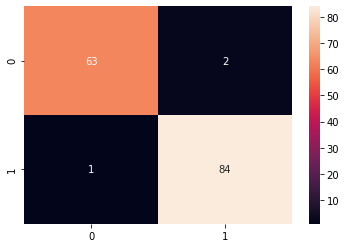

In [ ]:
### XGBoost on Reduced Features after Applying PCA
import xgboost as xgb

#XGBOOST after PCA
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(Train_Features_Reduced_PCA, train_labels) #For sklearn no one hot encoding


#Now predict using the trained RF model. 
prediction = model.predict(Test_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics
print ("Test Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM on REDUCED PCA Training Features

Accuracy =  0.9533333333333334


<AxesSubplot:>

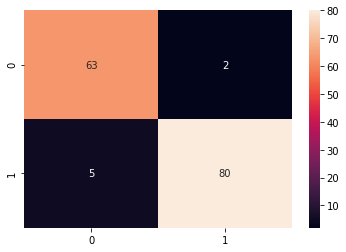

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test dataset
y_pred = clf.predict(Test_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM model(rbf) On REDUCED PCA Training Features

Accuracy =  0.98


<AxesSubplot:>

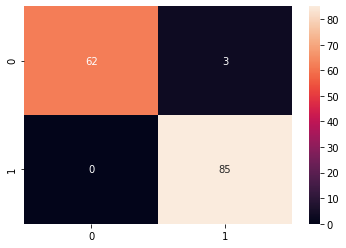

In [ ]:
#Import svm model On REDUCED PCA Training Features
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test dataset
y_pred = clf.predict(Test_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM on ALL Training Features

Accuracy =  0.8866666666666667


<AxesSubplot:>

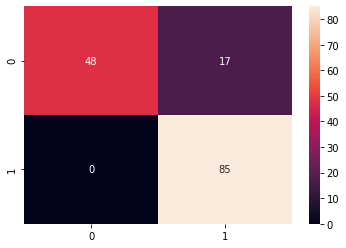

In [ ]:


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_for_training, train_labels)

#Predict the response for test dataset
y_pred = clf.predict(X_test_features)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# XGBoost on Reduced  Features

[19:50:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.98


<AxesSubplot:>

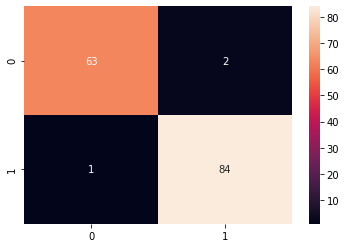

In [ ]:
#XGBOOST after PCA

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(Train_Features_Reduced_PCA, train_labels) #For sklearn no one hot encoding


#Now predict using the trained XGBOOST model. 
prediction = model.predict(Test_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

# Random Forest on Reduced Features

Accuracy =  0.98


<AxesSubplot:>

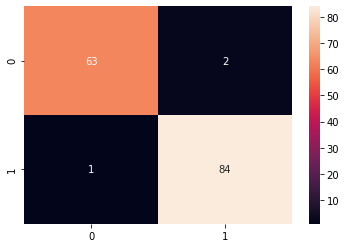

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Now predict using the trained RF model.
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(Train_Features_Reduced_PCA, train_labels) #For sklearn no one hot encoding

#Predict the response for test dataset
y_pred = RF_model.predict(Test_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)


# XGBoost on All training Features extracted
## Predicting on Training Data 

In [ ]:
#Now predict using the trained  

#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, train_labels) #For sklearn no one hot encoding

train_prediction = model.predict(X_for_training)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(train_labels, train_prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_labels, train_prediction)
#print(cm)
sns.heatmap(cm, annot=True)

## XGBOOST Predicting on Test Data (For ALL Features Extracted)

[19:51:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.96


<AxesSubplot:>

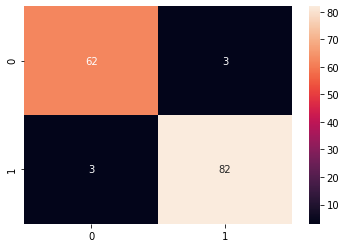

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, train_labels) #For sklearn no one hot encoding
#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)


## Random Forest Predicting on Test Data (For ALL Features Extracted)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(X_for_training, train_labels) #For sklearn no one hot encoding



RandomForestClassifier(n_estimators=50, random_state=42)

Accuracy =  0.9733333333333334


<AxesSubplot:>

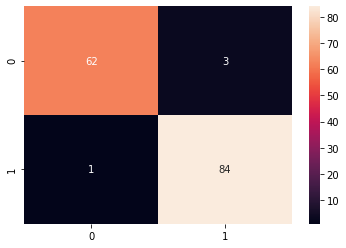

In [ ]:

#Now predict using the trained RF model. 
RF_model_prediction = RF_model.predict(X_test_features)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, RF_model_prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

RF_model_prediction_Confusion_Matrix = confusion_matrix(test_labels, RF_model_prediction)
#print(cm)
sns.heatmap(RF_model_prediction_Confusion_Matrix, annot=True)


In [ ]:
from __future__ import print_function
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, \
    add, multiply ,  Dense, Conv2D, Activation, Flatten
from keras.layers import concatenate, core, Dropout
from keras.models import Model
from keras.regularizers import l2

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Lambda
#import keras.backend as K
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation, add,average,concatenate , Conv2DTranspose
from keras.layers.core import Lambda
#from keras.optimizers import *
from keras.losses import binary_crossentropy
#%tensorflow_version 1.x
import os
import keras
from keras.callbacks import TensorBoard
import tensorflow as tf
#import keras.backend.tensorflow_backend as K
import keras.backend as K
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger

from glob import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix

from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf

warnings.filterwarnings("ignore")



# ****##Model 1:****

In [ ]:

model1 = Sequential()

# First Conv block
model1.add(Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (256,256,3)))
model1.add(Conv2D(16 , (3,3), padding = 'same' , activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
#model1.add(Dropout(0.2))

# Second Conv block
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# Third Conv block
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))


# FC layer 
model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 64 , activation = 'relu'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(units = 1 , activation = 'sigmoid'))


# Compile
model1.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy',precision,recall])
model1.summary()

# Implement callbacks 
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose = 1, mode='min', restore_best_weights = True)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights1.hdf5', monitor='val_loss',verbose=1, mode='min',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')

# Implement callbacks 
#checkpoint = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, save_weights_only=False)
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose = 1, mode='min', restore_best_weights = True)


# Train
history1 = model1.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 30, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger  ,  learning_rate_reduction ])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 128, 128, 32)      688       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 128, 128, 32)      1344      
_________________________________________________________________
batch_normalization_98 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)       

In [ ]:
model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights1.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)

# Train
history1 = model1.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 10, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger   ])



Epoch 1/10
600/600 [==============================] - 12s 21ms/step - loss: 0.1696 - accuracy: 0.9483 - precision: 0.8192 - recall: 0.8367 - val_loss: 0.1585 - val_accuracy: 0.9733 - val_precision: 0.8600 - val_recall: 0.8600

Epoch 00001: val_accuracy improved from -inf to 0.97333, saving model to Model_Weights1.hdf5
Epoch 2/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1691 - accuracy: 0.9483 - precision: 0.8267 - recall: 0.8492 - val_loss: 0.1539 - val_accuracy: 0.9733 - val_precision: 0.8600 - val_recall: 0.8600

Epoch 00002: val_accuracy did not improve from 0.97333
Epoch 3/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1718 - accuracy: 0.9475 - precision: 0.8317 - recall: 0.8542 - val_loss: 0.1484 - val_accuracy: 0.9800 - val_precision: 0.8733 - val_recall: 0.8733

Epoch 00003: val_accuracy improved from 0.97333 to 0.98000, saving model to Model_Weights1.hdf5
Epoch 4/10
600/600 [==============================] - 12s 21ms/step - loss:

### Accuracy of Model1

In [ ]:
#model1.load_weights("./Model_Weights1.hdf5")
print("Train_Accuracy" )
train_results = model1.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model1.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model1.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 1s 27ms/step - loss: 3.6036e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 0s 50ms/step - loss: 0.2437 - accuracy: 0.9800 - precision: 0.9818 - recall: 0.9923
Test_Accuracy
5/5 [==============================] - 0s 22ms/step - loss: 0.3861 - accuracy: 0.9667 - precision: 0.9533 - recall: 0.9895


In [ ]:
model1.load_weights("./Model_Weights1.hdf5")
print("Train_Accuracy" )
train_results = model1.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model1.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model1.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 1s 23ms/step - loss: 0.1565 - accuracy: 0.9591 - precision: 0.9426 - recall: 0.9960
Val_Accuracy
5/5 [==============================] - 0s 21ms/step - loss: 0.1484 - accuracy: 0.9800 - precision: 0.9818 - recall: 0.9923
Test_Accuracy
5/5 [==============================] - 0s 20ms/step - loss: 0.1686 - accuracy: 0.9533 - precision: 0.9222 - recall: 1.0000


## Predication of Model 1

In [ ]:
model1_pred = model1.predict(test_images)
pred = [1 if x > 0.5 else 0 for x in list(model1_pred[: , 0])]
model1_pred = np.array(pred)
model1_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

## Loss and Accuracy at each Epochs

# **MODEL_2**

In [ ]:
## Res2Net Model with Regularizers
IMG_SIZE = 256
h_heuns_method=0.5

def res_block(x, nb_filters, strides):
    res_path = BatchNormalization()(x)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0]  )(res_path)

    #res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] , kernel_regularizer=l2(0.01) )(res_path)

    res_path = BatchNormalization()(res_path)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1] )(res_path)

    #res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1], kernel_regularizer=l2(0.01) )(res_path)
    hpath = Lambda(lambda x: x * h_heuns_method)(res_path)
    shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0]  )(x)

    #shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0] , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    res_path = add([shortcut, hpath])#suma corta
    return res_path

def res_block2(x,y,nb_filters, strides):
    res_path = BatchNormalization()(x)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] )(res_path)
    #res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] , kernel_regularizer=l2(0.01) )(res_path)
    res_path = BatchNormalization()(res_path)
    res_path = Activation(activation='relu')(res_path)
    #res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1] , kernel_regularizer=l2(0.01) )(res_path)
    res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1]  )(res_path)

    hpath = Lambda(lambda x: x * h_heuns_method)(res_path)
    shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0]  )(x)

    #shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0] , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    res_path = add([shortcut, hpath])#suma corta

    res_path = average([y, res_path])#suma doble 
    return res_path


def encoder(x):
    features_extracted = []

    #main_path = Conv2D(filters= 64, kernel_size=(3, 3), padding='same', strides=(1, 1) , kernel_regularizer=l2(0.01) )(x)
    main_path = Conv2D(filters= 64, kernel_size=(3, 3), padding='same', strides=(1, 1) )(x)
    main_path = BatchNormalization()(main_path)
    main_path = Activation(activation='relu')(main_path)
    
    #main_path = Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1) , kernel_regularizer=l2(0.01) )(main_path)
    main_path = Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1) )(main_path)
    hpath = Lambda(lambda x: x * h_heuns_method)(main_path)
    shortcut = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1)  )(x)

    #shortcut = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1) , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    main_path = add([shortcut, hpath])#suma corta

    features_extracted.append(main_path)


    s1 = Conv2D(filters=128, kernel_size=(1, 1), strides=(2, 2) )(x)
    #s1 = Conv2D(filters=128, kernel_size=(1, 1), strides=(2, 2) , kernel_regularizer=l2(0.01))(x)

    s1 = BatchNormalization()(s1)
    s1 = Activation(activation='relu')(s1)
    s1 = Dropout(0.3)(s1)
    main_path = res_block2(main_path,s1, [128, 128], [(2, 2), (1, 1)]) 
    features_extracted.append(main_path)

    main_path = res_block(main_path, [256, 256], [(2, 2), (1, 1)])
    features_extracted.append(main_path)

    #s2 = Conv2D(filters=512, kernel_size=(1, 1), strides=(4, 4) , kernel_regularizer=l2(0.01) )(to_decoder[1])
    s2 = Conv2D(filters=512, kernel_size=(1, 1), strides=(4, 4)  )(features_extracted[1])
    s2 = BatchNormalization()(s2)
    s2 = Activation(activation='relu')(s2)
    s2 = Dropout(0.3)(s2)

    main_path = res_block2(main_path,s2, [512, 512], [(2, 2), (1, 1)])
    features_extracted.append(main_path)

    

    return features_extracted
    

def res2unet(lrate=8.00E-05,pretrained_weights=None):
    print(lrate)
    input_size=(IMG_SIZE, IMG_SIZE, 3)
    inputs = Input(shape=input_size)

    features_extracted = encoder(inputs)

    path = res_block(features_extracted[-1], [1024, 1024], [(2, 2), (1, 1)])####bridge

    # FC layer 
    x = Flatten()(path)
    #x = Dense(units = 1024 , activation = 'relu')(x)
    #x = Dropout(0.7)(x)
    x = Dense(units = 512 , activation = 'relu' , kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.7)(x)
    x = Dense(units = 128 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.5)(x)
    x=  Dense(units = 64 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.3)(x)



    #path = decoder(path, from_encoder=to_decoder)


    #path = Conv2D(2, kernel_size=(3, 3),activation='relu', padding='same', strides=(1, 1))(path)
    #path = Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(path)
    
    # Output layer
    output  = Dense(units = 1 , activation = 'sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=output )
    model.compile(optimizer=Adam(lr=lrate), loss = 'binary_crossentropy', metrics = ['accuracy',precision,recall])
    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model
    

model2 = res2unet(lrate=7.00E-05)

model2.summary()

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights2.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')




7e-05
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           batch_normalization[0][0]        
________________________________________________________________________________________

In [ ]:
# Train

history2 = model2.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 30, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger  ])

Epoch 1/30
600/600 [==============================] - 53s 84ms/step - loss: 17.6346 - accuracy: 0.5852 - precision: 0.5702 - recall: 0.5539 - val_loss: 14.9579 - val_accuracy: 0.8000 - val_precision: 0.7133 - val_recall: 0.7133

Epoch 00001: val_accuracy improved from -inf to 0.80000, saving model to Model_Weights2.hdf5
Epoch 2/30
600/600 [==============================] - 50s 83ms/step - loss: 21.2585 - accuracy: 0.5926 - precision: 0.5899 - recall: 0.6056 - val_loss: 16.2048 - val_accuracy: 0.8000 - val_precision: 0.7000 - val_recall: 0.6533

Epoch 00002: val_accuracy did not improve from 0.80000
Epoch 3/30
600/600 [==============================] - 50s 83ms/step - loss: 22.3722 - accuracy: 0.6277 - precision: 0.6340 - recall: 0.6304 - val_loss: 17.1999 - val_accuracy: 0.8667 - val_precision: 0.7667 - val_recall: 0.7600

Epoch 00003: val_accuracy improved from 0.80000 to 0.86667, saving model to Model_Weights2.hdf5
Epoch 4/30
600/600 [==============================] - 50s 84ms/step -

In [ ]:
model2.load_weights("./Model_Weights2.hdf5")
history2 = model2.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 10, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger  ])

Epoch 1/10
600/600 [==============================] - 61s 85ms/step - loss: 3.3257 - accuracy: 0.9267 - precision: 0.8124 - recall: 0.8042 - val_loss: 3.6445 - val_accuracy: 0.9733 - val_precision: 0.8800 - val_recall: 0.8733

Epoch 00001: val_accuracy improved from -inf to 0.97333, saving model to Model_Weights2.hdf5
Epoch 2/10
600/600 [==============================] - 50s 83ms/step - loss: 4.2292 - accuracy: 0.8898 - precision: 0.8067 - recall: 0.7996 - val_loss: 4.4232 - val_accuracy: 0.9333 - val_precision: 0.8467 - val_recall: 0.8200

Epoch 00002: val_accuracy did not improve from 0.97333
Epoch 3/10
600/600 [==============================] - 50s 83ms/step - loss: 4.2245 - accuracy: 0.9292 - precision: 0.8524 - recall: 0.8517 - val_loss: 3.3039 - val_accuracy: 0.9667 - val_precision: 0.8667 - val_recall: 0.8533

Epoch 00003: val_accuracy did not improve from 0.97333
Epoch 4/10
600/600 [==============================] - 50s 83ms/step - loss: 3.1891 - accuracy: 0.9571 - precision: 0

### Accuracy of Model 2

In [ ]:
#model2.load_weights("./Model_Weights2.hdf5")

print("Train_Accuracy" )
train_results = model2.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model2.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model2.evaluate(test_images, test_labels)


Train_Accuracy
38/38 [==============================] - 6s 164ms/step - loss: 2.3459 - accuracy: 0.9817 - precision: 0.9738 - recall: 0.9989
Val_Accuracy
5/5 [==============================] - 1s 154ms/step - loss: 2.3708 - accuracy: 0.9800 - precision: 0.9895 - recall: 0.9780
Test_Accuracy
5/5 [==============================] - 1s 178ms/step - loss: 2.3758 - accuracy: 0.9667 - precision: 0.9539 - recall: 0.9895


### Predications by Model 2

In [ ]:
model2_pred = model2.predict(test_images)
pred = [1 if x > 0.5 else 0 for x in list(model2_pred[: , 0])]
model2_pred = np.array(pred)
model2_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

<AxesSubplot:>

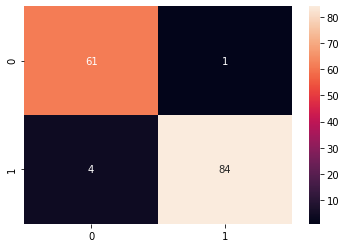

In [ ]:
cm = confusion_matrix(model2_pred, test_labels)
#print(cm)
sns.heatmap(cm, annot=True)

### Loss and Accuracy for each Epochs

In [ ]:
#plot the training and validation loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#plot the training and validation loss at each epoch
loss = history2.history['accuracy']
val_loss = history2.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# ****Model 3****

In [ ]:
def res2unet_SepConv(lrate=8.00E-05,pretrained_weights=None):
    print(lrate)
    input_size=(IMG_SIZE, IMG_SIZE, 3)
    inputs = Input(shape=input_size)

    Feature_Extracted = encoder(inputs)

    #path = res_block(to_decoder[-1], [1024, 1024], [(2, 2), (1, 1)])####bridge
    path = SeparableConv2D(512, (3,3), activation = 'relu', padding = 'same'  )(Feature_Extracted[-1])
    path = SeparableConv2D(512, (3,3), activation = 'relu', padding = 'same'  )(path)
    path = BatchNormalization()(path)
    path = MaxPooling2D(pool_size = (2,2))(path)
    #path = Dropout(0.2)(path)


    # FC layer 
    x = Flatten()(path)
    
    x = Dense(units = 512 , activation = 'relu'  )(x)
    x = Dropout(0.7)(x)
    x = Dense(units = 128 , activation = 'relu'  )(x)
    x = Dropout(0.5)(x)
    x=  Dense(units = 64 , activation = 'relu' )(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    # For dense = 1  or for binary classification, we use activation = "linear"
    output  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)
    
    model = Model(inputs=inputs, outputs=output )
    
    #model.compile(optimizer=Adam(lr=lrate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy',precision,recall])
    # For SVM as last layer we use Different Loss Function "squared_hinge" for multi-class and "hinge" loss for binary class 
    
    model.compile(optimizer=Adam(lr=lrate), loss = 'hinge', metrics = ['accuracy',precision,recall])

    model.summary()
    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model
    

model3 = res2unet_SepConv(lrate=7.00E-05)
#model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    #min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights3.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')



7e-05
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_134 (Conv2D)             (None, 256, 256, 64) 1792        input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 256, 256, 64) 256         conv2d_134[0][0]                 
__________________________________________________________________________________________________
activation_116 (Activation)     (None, 256, 256, 64) 0           batch_normalization_132[0][0]    
_____________________________________________________________________________________

In [ ]:
model3a =res2unet_SepConv(lrate=8.00E-05,pretrained_weights="../input/model3-weights/Model_Weights3.hdf5")



8e-05
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_148 (Conv2D)             (None, 256, 256, 64) 1792        input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_146 (BatchN (None, 256, 256, 64) 256         conv2d_148[0][0]                 
__________________________________________________________________________________________________
activation_125 (Activation)     (None, 256, 256, 64) 0           batch_normalization_146[0][0]    
_____________________________________________________________________________________

## Accuracy Of Model 3

In [ ]:

print("Train_Accuracy" )
train_results = model3a.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model3a.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model3a.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 7s 149ms/step - loss: 0.0349 - accuracy: 0.9956 - precision: 0.9936 - recall: 0.9994
Val_Accuracy
5/5 [==============================] - 1s 144ms/step - loss: 0.0120 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 1s 138ms/step - loss: 0.0120 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000


### Predication of Model 3

In [ ]:
model3_pred = model3a.predict(test_images)
pred = [1 if x > 0.5 else 0 for x in list(model3_pred[: , 0])]
model3_pred = np.array(pred)
model3_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
test_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

<AxesSubplot:>

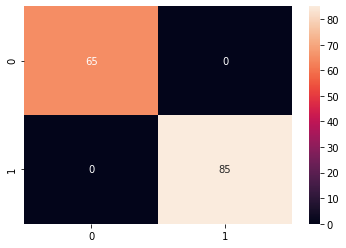

In [ ]:
cm = confusion_matrix(model3_pred, test_labels)
#print(cm)
sns.heatmap(cm, annot=True)